<a href="https://colab.research.google.com/github/dohyeon-kim012/MachineLearning-DeepLearning/blob/main/DeepLearning/11.CNN%2C%20Functional%20API%2C%20tf.data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 데이터 준비 및 시각화

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets

import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## 이미지 시각화 및 형상 shape 확인

In [ ]:
image = X_train[0]
image.shape

(28, 28)

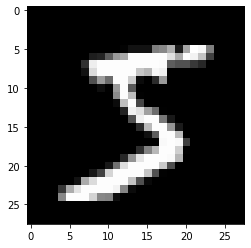

In [ ]:
plt.imshow(image, 'gray')
plt.show()

## CNN 레이어에 삽입하기 위한 배열 편집
* 4차원 형태의 데이터를 유지해야 한다
* `(N, H, W, C)` -> `(배치크기, 높이, 가로, 채널수)`
* MNIST 손글씨 이미지 : 높이 - 28px, 가로 - 28px, 채널 - 1ch
* 1장의 이미지 - `(28, 28)` -> `(1, 28, 28, 1)`로 바꿔야 한다

In [ ]:
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

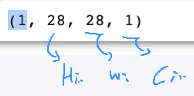

# **특징 추출 과정 ( Feature Extraction )**

## Conv 레이어 사용

Convolutional Layer : 합성곱 계층  

keras의 대표적인 CNN 레이어
1. **Conv2D**  
    - `stride`가 2 방향으로 움직인다 ( 가로, 세로 )
    - 이미지 분석을 위해 사용되는 일반적인 합성곱 레이어

2. **Conv1D**
    - `stride`가 1 방향으로 움직인다 ( 세로 )
    - 텍스트 분석을 위해 사용되는 레이어
        - ex ) `char CNN`


### Conv2D 매개변수 확인

- `filters` : 필터의 개수 ($C_{out}$)

- `kernal_size` : 필터의 크기 ($K_H$, $K_W$) - (세로, 가로)
    - 1 X 1, 3 X 3, 5 X 5, 7 X 7 필터를 주로 사용함
- `strides` : 몇 개의 픽셀을 스킵하면서 필터가 훑게 할지 결정 
    - 스트라이드 ↑ -> 출력 특징맵 크기 ↓
- `padding` : 0으로 쌓여진 패딩을 만들 것인지에 대한 설정
    - `VALID` : 패딩 만들지 않음
    - `SAME` : 값이 1인 패딩 생성
- `activation` : 활성화 함수 지정하기
    - 따로 지정하지 않고 추후에 레이어로 추가 가능

In [ ]:
tf.keras.layers.Conv2D(
    filters=3, 
    kernel_size=(3, 3), # 필터 (세로, 가로) 크기
    strides=(1, 1),
    padding='SAME',
    activation='relu' # 활성화 함수 미리 적용 -> 추후 레이어로 따로 추가도 가능함
)

필터나 스트라이드 생성 시 세로와 가로의 크기를 똑같이 하려면 굳이 튜플을 쓸 필요는 없다

```python
tf.keras.layers.Conv2D(
filters=3,
kernel_size=3, # = (3, 3)
strides=1 # = (1, 1)
)
```

### Convolution 레이어 시각화

In [ ]:
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

In [ ]:
layer = tf.keras.layers.Conv2D(filters=5, kernel_size=3, strides=1, padding='SAME')

In [ ]:
output = layer(image)  # image를 레이어에 통과 시키기
output.shape

TensorShape([1, 28, 28, 5])

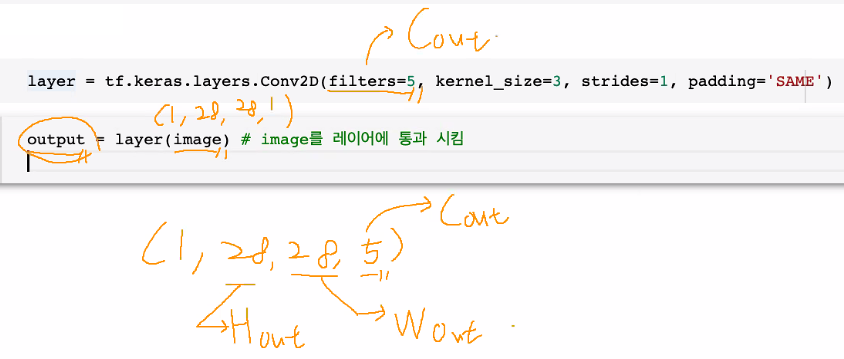

=> 출력 특징 맵이 5개 ( 합성곱 계층의 출력 데이터 )

In [ ]:
image.shape

TensorShape([1, 28, 28, 1])

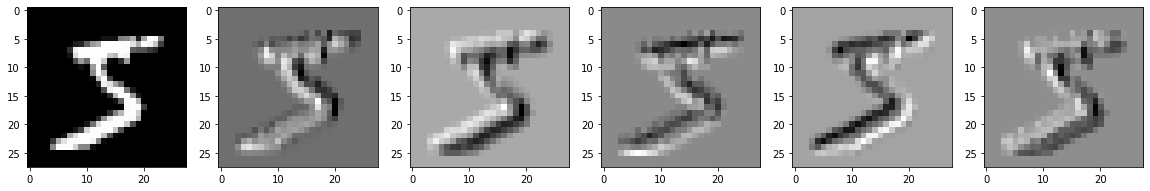

In [ ]:
# 출력 특징 맵을 시각화 하기
# 제일 앞 : 원본 이미지
# 이후 5개 : 출력 특징 맵 시각화

_, axes = plt.subplots(1, 6, figsize=(20, 10))
axes[0].imshow(image[0,...,0], 'gray')
axes[1].imshow(output[0,...,0], 'gray')
axes[2].imshow(output[0,...,1], 'gray')
axes[3].imshow(output[0,...,2], 'gray')
axes[4].imshow(output[0,...,3], 'gray')
axes[5].imshow(output[0,...,4], 'gray')

plt.show()

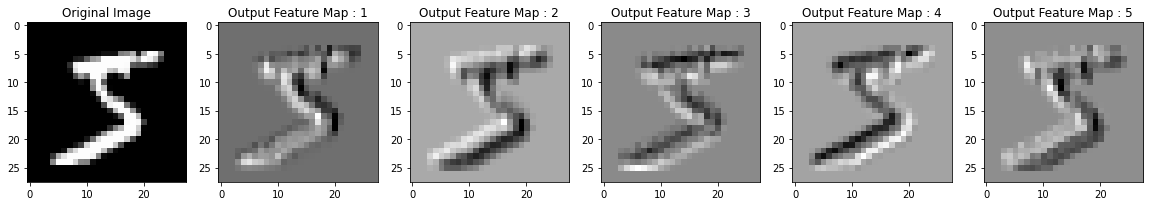

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))
axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1:]):
    ax.set_title("Output Feature Map : {}".format(idx + 1))
    ax.imshow(output[0, ..., idx], cmap='gray')

plt.show()

### Filter 시각화

- CNN에서 Filter의 역할은 실제 CNN 레이어가 이미지의 무엇을 보고 있는가를 이야기 함
- `keras`의 레이어들은 `get_weights()` 함수를 이용해 편향, 가중치 등을 볼 수 있음
    - `weights[0]` : 가중치
    - `weights[1]` : 편향

Conv2D 레이어의 필터 모양 :  
(3, 3, 1, 5) - (필터 세로, 필터 가로, 입력 특징 맵의 채널 개수, 출력 특징 맵의 채널 개수)

In [ ]:
weights = layer.get_weights()

In [ ]:
print("가중치(필터)의 형샹 : {}".format(weights[0].shape))
print("편향의 형샹 : {}".format(weights[1].shape))

가중치(필터)의 형샹 : (3, 3, 1, 5)
편향의 형샹 : (5,)


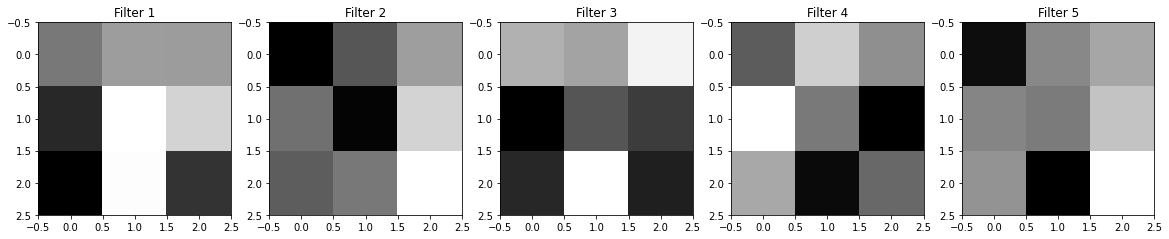

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))

for idx, ax in enumerate(axes):
    ax.set_title("Filter {}".format(idx+1))
    ax.imshow(weights[0][..., 0, idx], cmap='gray')

plt.show()

## ReLU 레이어 사용

- 이미지 분석에서 자주 사용
- 이미지 데이터에서는 음수 데이터는 필요가 없음
    - 필요 없는 음수 데이터를 제거하고, 의미 있는 양수 데이터만 강조하기 위해 `ReLU`가 일반적으로 사용됨

In [ ]:
import numpy as np
np.min(output), np.max(output)

(-164.87689, 141.44705)

In [ ]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output) # 합성곱의 결과가 활성화 레이어로 들어감
act_output.shape

TensorShape([1, 28, 28, 5])

In [ ]:
np.min(act_output), np.max(act_output)

(0.0, 141.44705)

ReLU 의 결과로 음수 데이터는 전부 제거 되었음을 알 수 있다

### ReLU 레이어 시각화

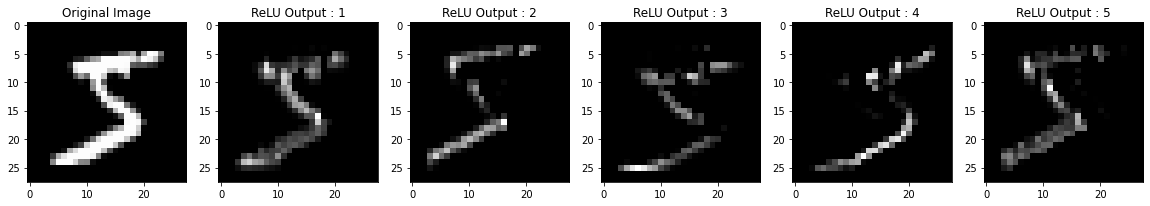

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))

axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1:]):
    ax.set_title("ReLU Output : {}".format(idx + 1))
    ax.imshow(act_output[0, ..., idx], cmap='gray')

plt.show()

## MaxPooling 레이어 사용

`Pooling` : 풀링을 통해 이미지 축소 및 정보의 종합 구현

In [ ]:
pool_layer = tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=(2, 2),
    padding='SAME'
)
pool_output = pool_layer(act_output)

pool_output.shape

TensorShape([1, 14, 14, 5])

pooling의 결과로 이미지가 줄어든 것을 알 수 있다

### MaxPooling 레이어 시각화

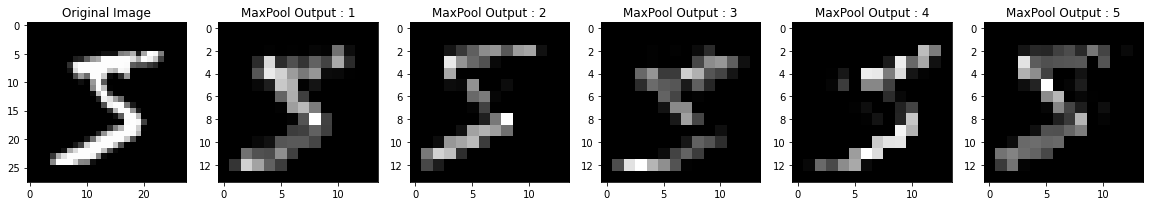

In [ ]:
_, axes = plt.subplots(1, 6, figsize=(20, 10))

axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1:]):
    ax.set_title("MaxPool Output : {}".format(idx+1))
    ax.imshow(pool_output[0, ..., idx], cmap='gray')

plt.show()

# Prediction 과정

앞의 특징 추출 과정 ( Feature Extraction ) 에서 추출된 특징을 바탕으로 예측 수행

## Flatten 레이어 확인하기
* `MaxPool2D` 까지는 특징 추출 과정
  * 예측을 하기 위한 과정이 아닌, 데이터(이미지)에 대한 특징만 추출
* 예측을 수행하기 위해서는 `Fully Connected`(전결합) 과정이 필요하다.
  * `Dense` 레이어를 사용한다.
* `Fully Connected Layer`를 사용하기 위해서는 데이터가 **평탄화**되어 있어야 한다.

In [ ]:
flatten_layer = tf.keras.layers.Flatten()
flatten_output = flatten_layer(pool_output)

flatten_output.shape

TensorShape([1, 980])

## Dense 레이어 확인하기

계산 과정 $WX+b$ 를 하기 위한 `Dense Layer`  
= `Fully Connected Layer ( F.C.Layer )` 이라고도 한다

In [ ]:
# 유닛이 32개인 Dense 레이어 만들기
dense_layer = tf.keras.layers.Dense(32, activation='relu')
dense_output = dense_layer(flatten_output)

dense_output.shape

TensorShape([1, 32])

In [ ]:
# 출력층 설계
# 숫자는 10 종류니까 출력츠으이 뉴런 개수도 10개

dense_layer2 = tf.keras.layers.Dense(10, activation='relu')
dense_output2 = dense_layer2(dense_output)

dense_output2.shape

TensorShape([1, 10])

# Sequential 모델 구현해보기 

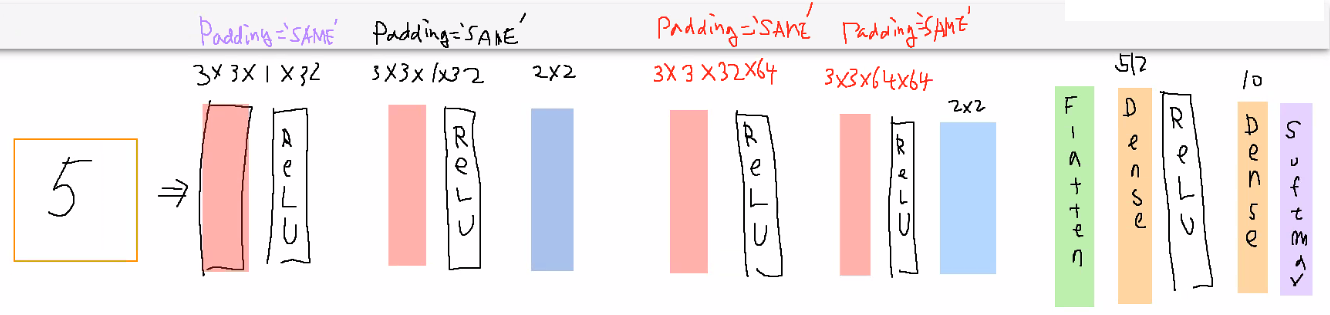

In [ ]:
# 1. 모델로써 사용할 Sequential import 하기
from tensorflow.keras.layers import Flatten, Dense, Input, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential

In [ ]:
# 2. Sequential에 레이어 쌓기
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(filters=32, kernel_size=3, padding='SAME', activation='relu'),
    Conv2D(filters=32, kernel_size=3, padding='SAME', activation='relu'),
    MaxPool2D(pool_size=(2, 2), padding='SAME'),
    
    Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu'),
    Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu'),
    MaxPool2D(pool_size=(2, 2), padding='SAME'),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0

Param (파라미터) 를 계산해보기  
$(K_H * K_W * C_{in} * C_{out}) + bias$

In [ ]:
# 3. 모델 컴파일
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
# 4. X 데이터에 채널 차원 추가
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
# 5. 이미지 정규화 작업 -> 255.0으로 나눠주기

X_train = X_train / 255.
X_test = X_test / 255.

In [ ]:
# 6. 모델에 fit하여 훈련하기
model.fit(X_train,
          y_train,
          validation_split=0.2,
          epochs=10,
          batch_size=32,
          shuffle=True)

Epoch 1/10
1500/1500 [==============================] - 9s 4ms/step - loss: 0.1195 - acc: 0.9637 - val_loss: 0.0692 - val_acc: 0.9801
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0395 - acc: 0.9878 - val_loss: 0.0464 - val_acc: 0.9884
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0271 - acc: 0.9914 - val_loss: 0.0359 - val_acc: 0.9903
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0210 - acc: 0.9929 - val_loss: 0.0370 - val_acc: 0.9899
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0145 - acc: 0.9951 - val_loss: 0.0417 - val_acc: 0.9891
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0136 - acc: 0.9955 - val_loss: 0.0337 - val_acc: 0.9922
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0099 - acc: 0.9966 - val_loss: 0.0406 - val_acc: 0.9919
Epoch 8/10
1500/1500 [==============================] - 6s 4ms

과대적합일 가능성이 큼

# 보너스

## tf.data 사용하기
* 일반적인 배열이 아닌, 병렬 처리 된 배열을 이용하여 매우 빠른 속도로 데이터의 입출력이 가능하게 된다.
* `dataset`이라는 개념을 이용해서 `feature`, `label`을 손쉽게 관리할 수 있다.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets

In [ ]:
mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

X_train, X_test = X_train/255., X_test/255.

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

4차원의 데이터들이 준비되었음

### tf.data의 함수들
* `from_tensor_slices()` : `feature`, `label`을 합친 데이터세트 (**ds**) 를 생성
- `shuffle()` : 데이터 세트에 있는 데이터를 랜덤하게 섞어줌
- `batch()` : 배치 생성하기
- `take()` : 데이터를 (이미 정해진) 배치 사이즈만큼 꺼내올 수 있음
    - `take(1)` : 1개의 배치만 꺼내옴

In [ ]:
# 데이터 세트를 제너레이트할 데이터를 넣어 주기
#   데이터를 병렬로 처리할 수 있게 됨 (속도가 매우 빨라짐)
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)) # tuple로 넣어주기

# 데이터 섞기
# 매개변수에 들어가는 숫자는 랜덤 시드가 아닌 랜덤을 생성하기 위한 버퍼 사이즈 ( 일반적으로 1KB 로 설정)
train_ds = train_ds.shuffle(1024)

# 배치 생성
# iteration 할 때마다 batch_size 만큼 데이터 나옴 (여기서는 32)
#    한 번 반복할 때마다 32개씩 데이터가 나옴
train_ds = train_ds.batch(32) 

In [ ]:
# 테스트 ds 만들기
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# 테스트 세트는 셔플 필요 없음 -> 배치만 설정해 주기
test_ds = test_ds.batch(32)

`take()` 함수를 이용하면 데이터를 (이미 정해진) 배치 사이즈만큼 꺼내올 수 있음

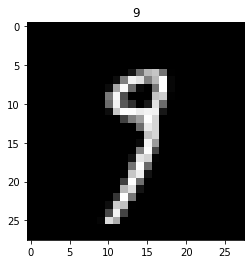

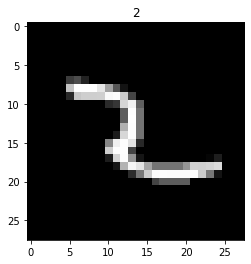

In [ ]:
for images, labels in train_ds.take(2):
    # print(images.shape, labels.shape)
    image = images[0, ..., 0]
    label = labels.numpy()[0]

    plt.title(label)
    plt.imshow(image, cmap='gray')
    plt.show()

### tf.data를 이용해서 Sequantial 모델 훈련하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D # Feature Extraction Layers
from tensorflow.keras.layers import Flatten, Dense # Fully Connected Layers

from tensorflow.keras.layers import Dropout  # 일부 데이터의 가중치를 0으로 만드는 역할

In [ ]:
model = Sequential([
                    
    #### Feature Extraction ####
    Conv2D(32, 3, padding='SAME', input_shape=(28, 28, 1), activation='relu'),
    Conv2D(32, 3, padding='SAME', activation='relu'),
    MaxPool2D(2),

    Dropout(0.25),  # 가중치를 0으로 만들 데이터의 비율 지정 : 25% - 과대적합 방지

    Conv2D(64, 3, padding='SAME', activation='relu'),
    Conv2D(64, 3, padding='SAME', activation='relu'),
    MaxPool2D(2),

    Dropout(.25),

    #### Fully Connected ####
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

**최적화** - 컴파일하기

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

tf.data를 이용해서 훈련

In [ ]:
model.fit(train_ds, epochs=1)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.1197 - acc: 0.9628


## Functional API

**Tensorflow로 모델링하는 2가지 방법**

1. `Sequential` 모델링을 활용하는 방법
  * keras에서 제공하는 레이어들을 이어 붙여 가면서 모델링하는 방법
  * 쉽고 빠르게 모델링이 가능하다.
  * 레이어들에 대한 커스터마이징이 조금 힘들다.
2. `Functional API`를 활용하는 방법
  * 개발자가 직접 레이어를 정의해서 keras의 레이어처럼 사용하게 할 수 있다.(`tf.keras.layers` 상속)
  * 기타 평가 방식이나 Loss, Optimizer 등등을 직접 정의해서 사용할 수 있다.

### @tf.function

- `Functional API` 에서 가장 많이 사용되는 데코레이터 패턴  
`Tensorflow 세션` ( 계산그래프 ) 에서 관리하는 함수가 될 수 있도록 해줌

* `@tf.function`이 붙은 함수는 계산그래프가 모두 그려지고나서 실제 학습이 되면서 수행되기 때문에 `Tensorflow`의 리소스를 이용할 수 있게 된다.
* 학습 및 테스트하는 함수에 붙는다.

---> 순전파와 역전파를 Tensorflow로 한정해서 구현하겠다는 의미

훈련에 있어서 최소한의 요건은 `data`와 `label`임

In [ ]:
# Loss Function
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

# Optimizer
optimizer = tf.keras.optimizers.Adam()

# Train / Test Loss 를 평균으로 관리
# SparseCategoricalAccuracy 원핫인코딩이 되어있지 않은 데이터에 대한 Accuracy
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

@tf.function
def train_step(images, labels):
    # 자동 미분 수행을 위한 환경 만들기
    # loss를 구하는 과정
    with tf.GradientTape() as tape: # 미분 준비 과정 (미분에 필요한 loss도 구함)
        # 1. 예측
        prediction = model(images) # 모델이 훈련 모드가 됨
        
        # 2. loss 구하기
        loss = loss_object(labels, prediction)

    # 3. 오차 역전파 수행 (grads : 수정 되어야할 기울기 벡터)
    # 각 매개변수별 기울기 구하기
    grads = tape.gradient(loss, model.trainable_variables)
    # model.trainable_variables : 가중치, 편향 정보 (갱신이 가능한)

    # 4. 최적화 수행 (apply_gradients : 매개변수 갱신)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # 5. loss, accuracy 기록
    train_loss(loss)
    train_accuracy(labels, prediction)

In [ ]:
@tf.function
def test_step(images, labels):
    prediction = model(images)
    t_loss = loss_object(labels, prediction)

    test_loss(t_loss)
    test_accuracy(labels, prediction)

모델 재실행

In [ ]:
model = Sequential([
                    
    #### Feature Extraction ####
    Conv2D(32, 3, padding='SAME', input_shape=(28, 28, 1), activation='relu'),
    Conv2D(32, 3, padding='SAME', activation='relu'),
    MaxPool2D(2),

    Dropout(0.25),  # 가중치를 0으로 만들 데이터의 비율 지정 : 25% - 과대적합 방지

    Conv2D(64, 3, padding='SAME', activation='relu'),
    Conv2D(64, 3, padding='SAME', activation='relu'),
    MaxPool2D(2),

    Dropout(.25),

    #### Fully Connected ####
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)         

### Functional API 훈련하기

In [ ]:
epochs = 10

for epoch in range(epochs):
    # 1. 에폭은 모든 데이터에 대한 학습
    for images, labels in train_ds:
        train_step(images, labels)

    # 테스트 수행
    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)

    template = "Epoch {}, Train Loss : {:.3f}, Train Accuracy : {:.3f} /// Test Loss : {:.3f}, Test Accuracy : {:.3f}"
    print(template.format(epoch + 1, train_loss.result(), train_accuracy.result() * 100,
                                     test_loss.result(), test_accuracy.result() * 100))

Epoch : 1, Train Loss : 0.097, Train Accuracy : 97.055 /// Test Loss : 0.041, Test Accuracy : 98.740
Epoch : 2, Train Loss : 0.066, Train Accuracy : 98.007 /// Test Loss : 0.043, Test Accuracy : 98.710
Epoch : 3, Train Loss : 0.052, Train Accuracy : 98.434 /// Test Loss : 0.039, Test Accuracy : 98.797
Epoch : 4, Train Loss : 0.043, Train Accuracy : 98.685 /// Test Loss : 0.037, Test Accuracy : 98.838
Epoch : 5, Train Loss : 0.037, Train Accuracy : 98.855 /// Test Loss : 0.036, Test Accuracy : 98.874
Epoch : 6, Train Loss : 0.033, Train Accuracy : 98.981 /// Test Loss : 0.036, Test Accuracy : 98.887
Epoch : 7, Train Loss : 0.030, Train Accuracy : 99.081 /// Test Loss : 0.035, Test Accuracy : 98.930
Epoch : 8, Train Loss : 0.027, Train Accuracy : 99.161 /// Test Loss : 0.035, Test Accuracy : 98.949
Epoch : 9, Train Loss : 0.025, Train Accuracy : 99.231 /// Test Loss : 0.037, Test Accuracy : 98.961
Epoch : 10, Train Loss : 0.023, Train Accuracy : 99.286 /// Test Loss : 0.036, Test Accurac